In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import random
from myConvexHull.process import Convex
from scipy.spatial import ConvexHull



Choose your dataset: 
1. Iris dataset
2. Wine dataset
3. Digits dataset
4. Breast cancer dataset
0. Exit
 
Available columns:
0. sepal length (cm)
1. sepal width (cm)
2. petal length (cm)
3. petal width (cm)

Input your column (max:5): 
Note: the y-column taken would be the column right next to the inputted column!


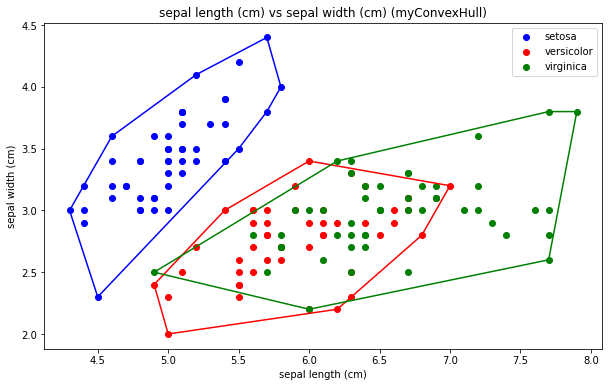

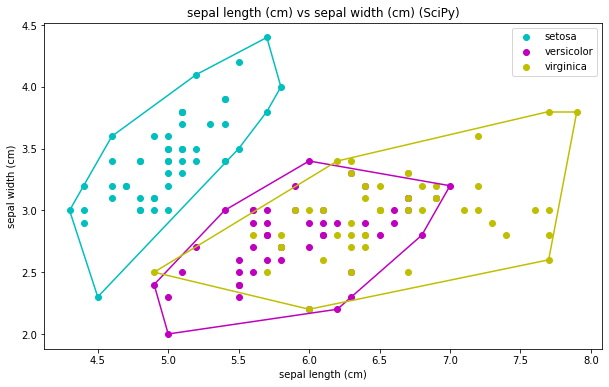



Choose your dataset: 
1. Iris dataset
2. Wine dataset
3. Digits dataset
4. Breast cancer dataset
0. Exit


In [14]:
option = 1
while (option != 0):
    print("\n\nChoose your dataset: ")
    print("1. Iris dataset")
    print("2. Wine dataset")
    print("3. Digits dataset")
    print("4. Breast cancer dataset")
    print("0. Exit")
    option = int(input("Input your option >>> "))
    
    while (option not in range(0, 5)):
        print("Invalid input! Try again.\n")
        option = int(input("Input your option >>> "))
        
    if (option == 1):
        data = datasets.load_iris()
    elif (option == 2):
        data = datasets.load_wine()
    elif option == 3:
        data = datasets.load_digits()
    elif option == 4:
        data = datasets.load_breast_cancer()
    elif option == 0:
        print("Exiting program...")
        break
    print(" ")
    df = pd.DataFrame(data.data, columns = data.feature_names)
    df['Target'] = pd.DataFrame(data.target)
    print("Available columns:")
    for i in range(len(df.columns) - 1):
        print("{}. {}".format(i, df.columns[i]))
    
    print("\nInput your column (max:{}): ".format(len(df.columns)))
    print("Note: the y-column taken would be the column right next to the inputted column!")
    cols = int(input("Input your column (max: {}):".format(len(df.columns))))
    while (cols + 1 >= len(df.columns) - 1):
        print("Invalid input! Try again.\n")
        cols = int(input("Input your column (max: {}):".format(len(df.columns))))
        
    title = data.feature_names[cols] + " vs " + data.feature_names[cols + 1]
    
    # Penggunaan library myConvexHull
    plt.figure(figsize = (10, 6))
    plt.title(title + ' (myConvexHull)')
    plt.xlabel(data.feature_names[cols])
    plt.ylabel(data.feature_names[cols + 1])

    ConvexObj = Convex()
    colors = ['b', 'r', 'g']

    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i].iloc[:, [cols, cols + 1]].values
        hull = ConvexObj.ConvexHull(bucket)
        
        if (i >= len(colors)):
            tempColor = random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)
        else:
            tempColor = colors[i]
            
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = tempColor)
        plt.plot(hull[0], hull[1], color = tempColor)
    plt.legend()
    plt.show()

    # Perbandingan menggunakan library SciPy
    plt.figure(figsize = (10, 6))
    plt.title(title + ' (SciPy)')
    plt.xlabel(data.feature_names[cols])
    plt.ylabel(data.feature_names[cols + 1])

    scolors = ["c", "m", "y"]
    for i in range(len(data.target_names)):
        bucket = df[df['Target'] == i].iloc[:, [cols, cols + 1]].values
        hull = ConvexHull(bucket)
        
        if (i >= len(scolors)):
            tempColor = random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)
        else:
            tempColor = scolors[len(scolors) - 1 - i]
            
        plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i], color = tempColor)
        for simplex in hull.simplices:
            plt.plot(bucket[simplex, 0], bucket[simplex, 1], color = tempColor)
    plt.legend()
    plt.show()
